# Laboratorio 7: Clasificación 🤗

<center><strong>MDS7202: Laboratorio de Programación Científica para Ciencia de Datos - Primavera 2024</strong></center>


### Cuerpo Docente:

- Profesores: Ignacio Meza, Sebastián Tinoco
- Auxiliar: Eduardo Moya
- Ayudantes: Nicolás Ojeda, Melanie Peña, Valentina Rojas

### Equipo: SUPER IMPORTANTE - notebooks sin nombre no serán revisados

- Nombre de alumno 1: Cristopher Urbina H.
- Nombre de alumno 2: Joaquin Zamora O.

### **Link de repositorio de GitHub:** [Repositorio](https://github.com/CrisU8/MDS7202-Primavera2024)

### Temas a tratar
- Clasificación en problemas desbalanceados
- Lightgbm y xgboost
- Pipelines

### Reglas:

- **Grupos de 2 personas**
- Cualquier duda fuera del horario de clases al foro. Mensajes al equipo docente serán respondidos por este medio.
- Prohibidas las copias.
- Pueden usar cualquer matrial del curso que estimen conveniente.
- Código que no se pueda ejecutar, no será revisado.



### Objetivos principales del laboratorio
- Comprender cómo trabajar con problemas de clasificación con clases desbalanceadas.
- Aplicar los modelos lightgbm y xgboost.
- Practicar Pipelines

# Parte Teórica [12 puntos]




1. Explique cuál es la diferencia entre los datos de entrenamiento y validación. [1 punto]

2. Explique cuál es el principal desafío al trabajar problemas de clasificación con data no supervisada. [1 punto]

3. Explique en **sus palabras** qué es la matriz de confusión y para qué se utiliza. [1 puntos]

4. Escriba la fórmula de las siguientes métricas y explique con **sus palabras** cómo se interpretan. [1 punto cada uno]

  * Accuracy
  * Precision
  * Recall
  * F1 score

5. Explique qué métrica recomendaría para los siguientes contextos de clasificación. [1 punto cada uno]

  * Mantenimiento predictivo de fallas de maquinaria pesada en la industria minera.  
  * Detección de enfermedades altamente contagiosas.
  * Aprobación de créditos de alto riesgo.
  * Detección de crímenes.

6. Explique qué es la calibración de modelos y para qué se usa. [1 punto]


**Respuesta:**

*1. No existe diferencia en la naturaleza de los datos ya que provienen de la misma fuente de información, sin embargo, la utilización de estos es diferente porque los datos de entrenamiento son para ajustar los parámetros del modelo, mientras que los de validación son para medir el rendimiento del entrenamiento permitiendo detectar problemas en la generalización del modelo, por esto mismo este tipo de datos no han sido visualizados previamente en el entrenamiento.

2. El principal problema radica en el hecho que el modelo no posee una confirmación respecto a si está clasificando de buena manera, es decir, no posee una etiqueta en la cual basarse. En consecuencia, existen dificultades para tanto para la evaluación como para interpretabilidad de los resultados del modelo.

3. La matriz de confusión es una forma de validar los modelos de clasificación, esto se hace a través de una matriz NxN entre la cantidad de clases (N) y las predicciones correctas e incorrectas del modelo. Para esto se calculan cuatro tasas (verdaderos positivos, falsos positivos, verdaderos negativos y falsos negativos) de manera que posteriormente se computan métricas de evaluación como Accuracy, Precision, Recall y F1-score. La importancia de estas depende netamente del contexto del problema.

4. ¿PARA QUE CASO SE APLICA CADA UNA?

* Accuracy: Se mide la proporción entre las predicciones realizadas correctamente con el total de predicciones

  $$Accuracy = \frac{TP + TN}{(TP+FP+TN+FN)}$$

* Precision: Mide la proporción entre las predicciones verdaderamente positivas con respecto al total de clasificaciones predichas como positivas (tanto falsas como verdaderas).
  
  $$Precision =\frac{TP}{(TP + FP)}$$

  * Recall: Mide la proporción entre las predicciones verdaderamente positivas y sobre el total real de instancias positivas.
  
  $$Recall = \frac{TP}{(TP+FN)}$$

  * F1 score: Es una combinación entre las métricas de precision y recall, establecimiento un promedio armónico entre ellas.
  
  $$F1score = \frac{2PR}{(P+R)}$$

  5.
  
  * Mantenimiento predictivo de fallas de maquinaria pesada en la industria minera: En este contexto el costo de oportunidad de no producir es elevadísimo, en base a esto el costo de no predecir una falla que ocurrirá (falso negativo) es mayor que predecir una falla que no ocurre, por lo mismo se debería usar recall.
  * Detección de enfermedades altamente contagiosas: El hecho de pronosticar un falso negativo puede provocar una reacción en cadena de infecciones, siendo más costoso que clasificar un falso positivo, por lo que se debería utilizar recall.
  * Aprobación de créditos de alto riesgo: El mayor riesgo es el de impago, por lo que, el tener un falso positivo (persona sujeta a crédito) es más costoso que un falso negativo (persona no sujeta a crédito por mala clasificación), por esto hay que emplear la métrica precision.
  * Detección de crímenes: El mayor riesgo está en detectar un incidente criminal como una situación no delictiva, de esta manera el falso negativo es más costoso que un falso positivo (falsa alarma de delito). Por lo tanto, se debería usar recall.

  6. La calibración de modelos trata de establecer la igualdad entre las probabilidades de las predicciones del modelo respecto a un suceso con las probabilidades reales de dicho evento. Por lo mismo, se utiliza en los casos donde las decisiones erróneas poseen efectos negativos significativos.*

# Parte práctica [48 puntos]

<p align="center">
  <img src="https://i.ibb.co/61L8z0w/renacin-by-volframio-dcirf4l-fullview.jpg"
" width="400">
</p>



Tras el trágico despido de la mítica mascota de Maipú, Renacín decide adentrarse como consultor en el mercado futbolero, el cuál (para variar...) está cargado en especulaciones.

Como su principal tarea será asesorar a los directivos de los clubes sobre cuál jugador comprar y cuál no, Renacín desea generar modelos predictivos que evaluén distintas características de los jugadores; todo con el fin de tomar decisiones concretas basadas en los datos.

Sin embargo, su condición de corporeo le impidió tomar la versión anterior de MDS7202, por lo que este motivo Renacín contrata a su equipo para lograr su objetivo final. Dado que aún tiene fuertes vínculos con la dirección de deportes de la municipalidad, el corporeo le entrega base de datos con las estadísticas de cada jugador para que su equipo empieze a trabajar ya con un dataset listo para ser usado.


**Los Datos**

Para este laboratorio deberán trabajar con el csv `statsplayers.csv`, donde deberán aplicar algoritmos de aprendizaje supervisado de clasificación en base a características que describen de jugadores de fútbol.

Para comenzar cargue el dataset señalado y a continuación vea el reporte **`Player_Stats_Report.html`** (adjunto en la carpeta del enunciado) que describe las características principales del `DataFrame`.

In [1]:
# Si usted está utilizando Colabolatory le puede ser útil este código para cargar los archivos.
try:
    from google.colab import drive
    drive.mount("/content/drive")
    path = 'Dirección donde tiene los archivos en el Drive'
except:
    print('Ignorando conexión drive-colab')

Ignorando conexión drive-colab


## 1. Predicción de Seleccionados Nacionales [14 puntos]

<p align="center">
  <img src="https://www.futuro.cl/wp-content/uploads/2016/06/chile-argentina-meme-12.jpg" width="300">
</p>



### 1.1 Preprocesamiento [5 puntos]

Tareas:

1. Genere los labels para la clasificación binaria en una variable llamada `label`. Para esto, trabaje sobre el atributo `National_Position` suponiendo que los valores nulos son jugadores no seleccionados para representar a su país. [Sin puntaje]

2. Hecho esto, ¿cuántos se tienen ejemplos por cada clase? Comente lo que observa. [1 punto]

3. Genere un `ColumnTransformer` en donde especifique las transformaciones que hay que realizar para cada columna (por ejemplo StandarScaler, MinMaxScaler, OneHotEncoder, etc...) para que puedan ser utilizadas correctamente por el modelo predictivo y guárdelo una variable llamada `col_transformer`. [2 puntos]

4. Comente y justifique las transformaciones elegidas sobre cada una de las variables (para esto utilice el material `Player_Stats_Report.html` que viene en el zip del lab), al igual que las transformaciones aplicadas. [2 puntos]

**Respuesta:**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px

In [3]:
df = pd.read_csv('stats_players.csv')
df.head()

,Name,Nationality,National_Position,Club_Position,Height,Weight,Preffered_Foot,Age,Work_Rate,Weak_foot,...,Agility,Jumping,Heading,Shot_Power,Finishing,Long_Shots,Curve,Freekick_Accuracy,Penalties,Volleys
0,Cristiano Ronaldo,Portugal,LS,LW,185,80,Right,32,High / Low,4,...,90,95,85,92,93,90,81,76,85,88
1,Lionel Messi,Argentina,RW,RW,170,72,Left,29,Medium / Medium,4,...,90,68,71,85,95,88,89,90,74,85
2,Neymar,Brazil,LW,LW,174,68,Right,25,High / Medium,5,...,96,61,62,78,89,77,79,84,81,83
3,Luis Suárez,Uruguay,LS,ST,182,85,Right,30,High / Medium,4,...,86,69,77,87,94,86,86,84,85,88
4,Manuel Neuer,Germany,GK,GK,193,92,Right,31,Medium / Medium,4,...,52,78,25,25,13,16,14,11,47,11


In [8]:
df.National_Position.isna().count()

17588

In [4]:
# Se genera variable label
df['label'] = df['National_Position'].notnull().astype(int)
df[df.National_Position.isna()]

,Name,Nationality,National_Position,Club_Position,Height,Weight,Preffered_Foot,Age,Work_Rate,Weak_foot,...,Jumping,Heading,Shot_Power,Finishing,Long_Shots,Curve,Freekick_Accuracy,Penalties,Volleys,label
8,Zlatan Ibrahimović,Sweden,NaN,ST,195,95,Right,35,Medium / Low,4,...,72,80,93,90,88,82,82,91,93,0
12,Luka Modrić,Croatia,NaN,RCM,174,65,Right,31,High / Medium,4,...,67,55,73,71,82,79,77,80,74,0
18,Paul Pogba,France,NaN,LCM,191,84,Right,24,High / Medium,4,...,85,73,90,71,88,82,82,76,84,0
21,Marco Reus,Germany,NaN,LW,182,76,Right,27,Medium / Medium,4,...,72,51,87,84,85,90,84,84,88,0
28,Philipp Lahm,Germany,NaN,RB,170,66,Right,33,Medium / High,3,...,72,63,57,47,65,77,59,69,66,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17583,Adam Dunbar,Republic of Ireland,NaN,Sub,183,82,Right,19,Medium / Medium,1,...,56,14,16,13,13,11,13,15,12,0
17584,Dylan McGoey,Republic of Ireland,NaN,Sub,185,80,Right,19,Medium / Medium,2,...,53,12,17,12,11,12,13,16,12,0
17585,Tommy Ouldridge,England,NaN,Res,173,61,Right,18,High / Medium,2,...,61,41,44,28,42,35,36,42,37,0
17586,Mark Foden,Scotland,NaN,Sub,180,80,Right,21,Medium / Medium,3,...,48,15,23,14,12,13,12,24,12,0


In [13]:
# Ejemplos por cada clase
df['label'].value_counts(normalize=True)

label
0    0.938879
1    0.061121
Name: proportion, dtype: float64

> Desbalanceo notable de clases donde la clase 0 corresponde al 94% de los datos

In [23]:
# Se elimina la columna Name dado que no aporta información relevante al modelo,
# por otro lado, se decide eliminar Work_Rate por temas de interpretabilidad.
df = df.drop(columns=['Name', 'Work_Rate', 'National_Position'])

In [5]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler, MinMaxScaler

columnas_categoricas_nominales = ['Club_Position']
columnas_categoricas_ordinales = ['Weak_foot', 'Skill_Moves']
columnas_numericas = ['Height', 'Age', 'Ball_Control', 'Dribbling', 'Short_Pass', 'Finishing']

# Crear una lista de las columnas presentes en los datos actuales
columnas_disponibles = df.columns

# Crear pipeline para las columnas numéricas
pipeline_numericas = Pipeline(steps=[
    ('scaler', StandardScaler())
])

# Crear pipeline para las columnas categóricas nominales
pipeline_categoricas_nominales = Pipeline(steps=[
    ('onehot', OneHotEncoder(drop='first', handle_unknown='ignore'))  # OneHotEncoder para nominales
])

# Crear pipeline para las columnas categóricas ordinales
pipeline_categoricas_ordinales = Pipeline(steps=[
    ('ordinal', OrdinalEncoder()),  # OrdinalEncoder para ordinales
    ('minmax', MinMaxScaler())      # MinMaxScaler para escalar los valores ordinales
])

# Verificar si las columnas existen en el DataFrame antes de agregarlas al ColumnTransformer
transformadores = []

if any(col in columnas_disponibles for col in columnas_numericas):
    transformadores.append(('numericas', pipeline_numericas, [col for col in columnas_numericas if col in columnas_disponibles]))

if any(col in columnas_disponibles for col in columnas_categoricas_nominales):
    transformadores.append(('categoricas_nominales', pipeline_categoricas_nominales, [col for col in columnas_categoricas_nominales if col in columnas_disponibles]))

if any(col in columnas_disponibles for col in columnas_categoricas_ordinales):
    transformadores.append(('categoricas_ordinales', pipeline_categoricas_ordinales, [col for col in columnas_categoricas_ordinales if col in columnas_disponibles]))

# Unir todo en un solo ColumnTransformer, ignorando las columnas que no estén disponibles
col_transformer = ColumnTransformer(transformers=transformadores, remainder='passthrough')

# Pipeline final que incluye el transformador de columnas
preprocesor = Pipeline(steps=[
    ('transformaciones', col_transformer)
])

> El pipeline diseñado para el preprocesamiento de datos aborda adecuadamente tanto las variables numéricas como las categóricas nominales y ordinales. Para las variables numéricas, se aplica un StandardScaler que estandariza los valores, mejorando el rendimiento de los modelos que son sensibles a las magnitudes de las variables. Las variables categóricas nominales se transforman mediante un OneHotEncoder, convirtiendo las categorías en variables binarias, lo que facilita su uso en modelos que no pueden manejar directamente datos categóricos. Las variables categóricas ordinales se codifican con OrdinalEncoder, preservando el orden inherente de estas categorías, y luego se escalan con MinMaxScaler, asegurando que todas las variables estén en un rango comparable. Este enfoque integral garantiza que los datos estén bien preparados para ser utilizados en un modelo predictivo, evitando problemas como la multicolinealidad o diferencias de escala.
>
>Dado que muchas de las variables en el conjunto de datos presentan alta cardinalidad o están altamente correlacionadas entre sí, la selección de variables es crucial para reducir la redundancia y evitar problemas de multicolinealidad que puedan afectar el rendimiento del modelo. Las variables como Name y Nationality, con una alta cardinalidad, pueden no ser útiles en su forma actual debido a la gran cantidad de valores distintos, lo que podría dificultar su codificación sin generar un conjunto masivo de nuevas columnas. En estos casos, podría considerarse su eliminación o la aplicación de técnicas de reducción de dimensionalidad, como la agrupación o clustering de categorías similares.
>
>En cuanto a las variables numéricas como Height y Weight, que están altamente correlacionadas entre sí, y otras variables como Skill_Moves, Ball_Control y Dribbling, que también presentan una fuerte correlación, podría ser conveniente eliminar algunas de estas para evitar la redundancia en el modelo. Mantener variables altamente correlacionadas podría no aportar nueva información, ya que la mayoría de estas variables están reflejando el mismo fenómeno subyacente.
>
>Este enfoque justifica la necesidad de preprocesar los datos con transformaciones específicas y la posible reducción de variables, ya que con menos características redundantes, el modelo puede enfocarse en las variables más significativas y evitar sobreajustarse a patrones espurios. 
> 
> Por todas estas razones, se seleccionaron las variables en el codigo.








### 1.2 Entrenamiento [3 puntos]

Ahora, vamos a entrenar los pipelines generados en los pasos anteriores. Para esto, debe realizar las siguientes tareas:

1. Separe los datos de entrenamiento en un conjunto de entrenamiento y de prueba  (la proporción queda a su juicio). En este paso, seleccione los ejemplos de forma aleatoria e intente mantener la distribución original de labels de cada clase en los conjuntos de prueba/entrenamiento. (vea la documentación de `train_test_split`). [1 puntos]


2. Defina un pipeline llamado `pipeline_xgboost` y otro llamado `pipeline_lightgbm`. Estos pipelines deben tener el mismo ColumnTransformer definido en la sección de preprocesamiento, pero deben variar los clasificadores de acuerdo al nombre de cada pipeline. [1 puntos]

3. Entrene los pipelines. [1 punto]



**Respuesta:**

In [6]:
from sklearn.model_selection import train_test_split

X = df.drop('label', axis=1)  # Características (features)
y = df['label']                # Etiquetas (labels)

# Separar en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(
    X, 
    y, 
    test_size=0.2,         # 20% de los datos para prueba
    random_state=42,       # Semilla para reproducibilidad
    stratify=y             # Mantener la distribución original de las etiquetas
)

print("Tamaño del conjunto de entrenamiento:", X_train.shape[0])
print("Tamaño del conjunto de prueba:", X_test.shape[0])
print("Distribución de las etiquetas en el conjunto de entrenamiento:")
print(y_train.value_counts(normalize=True))
print("Distribución de las etiquetas en el conjunto de prueba:")
print(y_test.value_counts(normalize=True))


Tamaño del conjunto de entrenamiento: 14070
Tamaño del conjunto de prueba: 3518
Distribución de las etiquetas en el conjunto de entrenamiento:
label
0    0.938877
1    0.061123
Name: proportion, dtype: float64
Distribución de las etiquetas en el conjunto de prueba:
label
0    0.938886
1    0.061114
Name: proportion, dtype: float64


In [33]:
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

# Pipeline para XGBoost
pipeline_xgboost = Pipeline(steps=[
    ('preprocessor', preprocesor),  # Aplicar transformaciones de preprocesamiento
    ('classifier', XGBClassifier(use_label_encoder=False, eval_metric='mlogloss'))  # Clasificador XGBoost
])

# Pipeline para LightGBM
pipeline_lightgbm = Pipeline(steps=[
    ('preprocessor', preprocesor),  # Aplicar transformaciones de preprocesamiento
    ('classifier', LGBMClassifier())  # Clasificador LightGBM
])

In [35]:
pipeline_xgboost.fit(X_train, y_train)
pipeline_lightgbm.fit(X_train, y_train)

/home/crisu/miniconda3/envs/MDS-BBDD/lib/python3.8/site-packages/xgboost/core.py:158: UserWarning: [13:45:19] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[LightGBM] [Info] Number of positive: 860, number of negative: 13210
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000182 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 479
[LightGBM] [Info] Number of data points in the train set: 14070, number of used features: 33
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.061123 -> initscore=-2.731797
[LightGBM] [Info] Start training from score -2.731797


Pipeline(steps=[('preprocessor',
                 Pipeline(steps=[('transformaciones',
                                  ColumnTransformer(transformers=[('numericas',
                                                                   Pipeline(steps=[('scaler',
                                                                                    StandardScaler())]),
                                                                   ['Height',
                                                                    'Age',
                                                                    'Ball_Control',
                                                                    'Dribbling',
                                                                    'Short_Pass',
                                                                    'Finishing']),
                                                                  ('categoricas_nominales',
                                                                   Pipeline(steps=[('onehot',
                                                                                    OneHotEncoder(drop='first',
                                                                                                  handle_unknown='ignore'))]),
                                                                   ['Club_Position']),
                                                                  ('categoricas_ordinales',
                                                                   Pipeline(steps=[('ordinal',
                                                                                    OrdinalEncoder()),
                                                                                   ('minmax',
                                                                                    MinMaxScaler())]),
                                                                   ['Weak_foot',
                                                                    'Skill_Moves'])]))])),
                ('classifier', LGBMClassifier())])

### 1.3 Resultados [6 puntos]

1. Calcule las métricas accuracy, precisión y recall de la clase positiva (la que indica que un jugador es seleccionado nacional) para evaluar el rendimiento de los distintos modelos. Verifique sus resultados usando `classification_report`. [2 puntos]

2. Explique qué implican los valores de accuracy, precisión y recall de la clase positiva (la que indica que un jugador es seleccionado nacional) y cómo influye la cantidad de ejemplos por clase en los resultados obtenidos. [2 puntos]

3. Explique qué métrica le parece más adecuada y concluya qué modelo tiene un mejor desempeño. [2 puntos]

**Respuesta:**

In [36]:
# Predicciones con los modelos
y_pred_xgboost = pipeline_xgboost.predict(X_test)
y_pred_lightgbm = pipeline_lightgbm.predict(X_test)

In [38]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report

# Calcular las métricas para XGBoost
accuracy_xgboost = accuracy_score(y_test, y_pred_xgboost)
precision_xgboost = precision_score(y_test, y_pred_xgboost, pos_label=1)
recall_xgboost = recall_score(y_test, y_pred_xgboost, pos_label=1)

# Calcular las métricas para LightGBM
accuracy_lightgbm = accuracy_score(y_test, y_pred_lightgbm)
precision_lightgbm = precision_score(y_test, y_pred_lightgbm, pos_label=1)
recall_lightgbm = recall_score(y_test, y_pred_lightgbm, pos_label=1)

# Imprimir los resultados
print(f"XGBoost - Accuracy: {accuracy_xgboost}, Precision: {precision_xgboost}, Recall: {recall_xgboost}")
print(f"LightGBM - Accuracy: {accuracy_lightgbm}, Precision: {precision_lightgbm}, Recall: {recall_lightgbm}")

# Verificar resultados con classification_report
print("Classification report for XGBoost:")
print(classification_report(y_test, y_pred_xgboost, target_names=["No seleccionado", "Seleccionado"]))

print("Classification report for LightGBM:")
print(classification_report(y_test, y_pred_lightgbm, target_names=["No seleccionado", "Seleccionado"]))

XGBoost - Accuracy: 0.9340534394542354, Precision: 0.34545454545454546, Recall: 0.08837209302325581
LightGBM - Accuracy: 0.938601478112564, Precision: 0.48148148148148145, Recall: 0.06046511627906977
Classification report for XGBoost:
                 precision    recall  f1-score   support

No seleccionado       0.94      0.99      0.97      3303
   Seleccionado       0.35      0.09      0.14       215

       accuracy                           0.93      3518
      macro avg       0.64      0.54      0.55      3518
   weighted avg       0.91      0.93      0.92      3518

Classification report for LightGBM:
                 precision    recall  f1-score   support

No seleccionado       0.94      1.00      0.97      3303
   Seleccionado       0.48      0.06      0.11       215

       accuracy                           0.94      3518
      macro avg       0.71      0.53      0.54      3518
   weighted avg       0.91      0.94      0.92      3518



## 2. Predicción de posiciones de jugadores [4 puntos]

<p align="center">
  <img src="https://pbs.twimg.com/media/E1rfA1aWEAYU6Ny.jpg" width="300">
</p>

En una nueva jornada de desmesuradas transacciones deportivas, Renacín escuchó a sus colegas discutir acerca de que el precio de cada jugador depende en gran medida de la posición en la cancha en la que juega. Y además, que hay bastantes jugadores nuevos que no tienen muy claro en que posición verdaderamente brillarían, por lo que actualmente puede que actualmente estén jugando en posiciones sub-optimas.

Viendo que los resultados del primer análisis no son tan esperanzadores, el corporeo los comanda a cambiar su tarea: ahora, les solicita que construyan un clasificador enfocado en predecir la mejor posición de los jugadores en la cancha según sus características.

Para lograr esto, primero, les pide que etiqueten de la siguiente manera los valores que aparecen en el atributo `Club_Position`, pidiendo que agrupen los valores en los siguientes grupos:

**Nota**:  Renacín les recalca que **no deben utilizar los valores ```Sub``` y ```Res``` de esta columna**.

```python
ataque = ['ST', 'CF']
central_ataque = ['RW', 'CAM', 'LW']
central = ['RM', 'CM', 'LM']
central_defensa = ['RWB', 'CDM', 'LWB']
defensa = ['RB', 'CB', 'LB']
arquero = ['GK']
```

La elección del clasificador se justificar en base a la siguiente [guía](https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html) y se deben comentar los resultados obtenidos en la clasificación.

**Tareas:** [1 punto por tarea]

1. En un nuevo dataframe, aplique las etiquetas descritas anteriormente en cada uno de los valores señalados en esta sección y guárdelos en la variable `label`.
2. Cuente cuántos por clase quedan.
3. Entrene el nuevo pipeline y ejecute una evaluación de este.  
4. Comente los resultados obtenidos.

**Respuesta:**

In [7]:
# Definir las etiquetas para las posiciones
ataque = ['ST', 'CF']
central_ataque = ['RW', 'CAM', 'LW']
central = ['RM', 'CM', 'LM']
central_defensa = ['RWB', 'CDM', 'LWB']
defensa = ['RB', 'CB', 'LB']
arquero = ['GK']

# Etiquetar Club_Position
def etiquetar_posicion(pos):
    if pos in ataque:
        return 'ataque'
    elif pos in central_ataque:
        return 'central_ataque'
    elif pos in central:
        return 'central'
    elif pos in central_defensa:
        return 'central_defensa'
    elif pos in defensa:
        return 'defensa'
    elif pos in arquero:
        return 'arquero'
    else:
        return None  # Excluir las posiciones 'Sub' y 'Res'

df_nuevo = df.copy()
# Aplicar las etiquetas
df_nuevo['Club_Position'] = df_nuevo['Club_Position'].apply(etiquetar_posicion)

# Eliminar filas con valores 'None'
df_nuevo = df_nuevo.dropna(subset=['Club_Position'])

In [8]:
df_nuevo['Club_Position'].value_counts(normalize=True)

Club_Position
defensa            0.299568
central            0.230261
arquero            0.160447
central_ataque     0.147499
ataque             0.109165
central_defensa    0.053059
Name: proportion, dtype: float64

In [9]:
from sklearn.ensemble import RandomForestClassifier  # Ejemplo de modelo

# Separamos las características (X) y la variable objetivo (y)
X = df_nuevo.drop(columns=['Club_Position'])  # Características
y = df_nuevo['Club_Position']  # Variable objetivo

# Crear el mismo pipeline de preprocesamiento, ahora sin la columna Club_Position
columnas_categoricas_ordinales = ['Weak_foot', 'Skill_Moves']
columnas_numericas = ['Height', 'Age', 'Ball_Control', 'Dribbling', 'Short_Pass', 'Finishing']

# Crear pipeline para las columnas numéricas
pipeline_numericas = Pipeline(steps=[
    ('scaler', StandardScaler())
])

# Crear pipeline para las columnas categóricas ordinales
pipeline_categoricas_ordinales = Pipeline(steps=[
    ('ordinal', OrdinalEncoder()),  # OrdinalEncoder para ordinales
    ('minmax', MinMaxScaler())      # MinMaxScaler para escalar los valores ordinales
])

# Crear ColumnTransformer
col_transformer = ColumnTransformer(transformers=[
    ('numericas', pipeline_numericas, columnas_numericas),
    ('categoricas_ordinales', pipeline_categoricas_ordinales, columnas_categoricas_ordinales)
], remainder='drop')

# Crear el pipeline final con un modelo de clasificación
modelo_clasificacion = Pipeline(steps=[
    ('preprocesamiento', col_transformer),
    ('clasificador', RandomForestClassifier(random_state=42))  # Se puede cambiar el modelo según necesidad
])

# Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Entrenar el pipeline
modelo_clasificacion.fit(X_train, y_train)


Pipeline(steps=[('preprocesamiento',
                 ColumnTransformer(transformers=[('numericas',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['Height', 'Age',
                                                   'Ball_Control', 'Dribbling',
                                                   'Short_Pass', 'Finishing']),
                                                 ('categoricas_ordinales',
                                                  Pipeline(steps=[('ordinal',
                                                                   OrdinalEncoder()),
                                                                  ('minmax',
                                                                   MinMaxScaler())]),
                                                  ['Weak_foot',
                                                   'Skill_Moves'])])),
                ('clasificador', RandomForestClassifier(random_state=42))])

In [60]:
# Realizar predicciones
y_pred = modelo_clasificacion.predict(X_test)

# Calcular y mostrar las métricas
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.682741116751269
Classification Report:
                  precision    recall  f1-score   support

        arquero       1.00      1.00      1.00       125
         ataque       0.78      0.81      0.80        86
        central       0.52      0.57      0.54       192
 central_ataque       0.40      0.29      0.34       114
central_defensa       0.38      0.07      0.12        41
        defensa       0.73      0.86      0.79       230

       accuracy                           0.68       788
      macro avg       0.63      0.60      0.60       788
   weighted avg       0.66      0.68      0.66       788



>El modelo obtuvo una **accuracy** del 68.27%, lo que indica un rendimiento moderado. La clase "arquero" fue predicha perfectamente (precisión, recall y F1-score de 1.00), lo cual se explica por las características distintivas de esta posición. Para "ataque", el modelo mostró un buen desempeño con una precisión de 0.78 y un recall de 0.81, lo que refleja una capacidad aceptable para identificar a los jugadores en esta posición. Sin embargo, en clases como "central" y "central_ataque", el rendimiento fue inferior, con precisiones de 0.52 y 0.40 respectivamente, lo que sugiere dificultades del modelo para distinguir correctamente estas posiciones. El rendimiento más bajo se observó en "central_defensa", con un recall de solo 0.07, lo que implica que el modelo no identifica bien a los jugadores en esta clase.

## 3. Predicciones de Seleccionados Nacionales para el Jere Klein [30 puntos]

<center>
<img src='https://www.radioactiva.cl/wp-content/uploads/2024/04/Jere-Klein-1-768x432.webp' width=500 />

Después de alcanzar la fama como cantante urbano, Jere Klein decide explorar una nueva faceta. Con su amor por el fútbol y convencido de que los artistas urbanos poseen un talento y versatilidad excepcionales, Jere se embarca en un proyecto innovador: desarrollar un sistema de inteligencia artificial capaz de identificar a jugadores que tienen potencial para convertirse en futbolistas profesionales. Su teoría es que muchos artistas del género urbano chileno, con sus habilidades únicas y su disciplina, podrían destacarse también en el deporte. Con este sistema, Jere espera no solo abrir nuevas oportunidades para sus colegas artistas, sino también demostrar la amplia gama de talentos que pueden ofrecer.

### 2.1 ¿Qué modelo de árbol es más de "pana"? [10 puntos]

<center>
<img src='https://64.media.tumblr.com/39189215a7d3d96823cb359f35b44e05/tumblr_psmrhrR3Xw1qf5hjqo4_540.gif' width=300 />


**Tareas**


1. Considerando el la variable llamada `label` creada en la sección 1.1. Para determinar cuál modelo de árbol sería más adecuado para la tarea en cuestión, utilice PyCaret. Este deberá centrarse exclusivamente en modelos de tipo árbol. Jere ha especificado que busca un modelo que tome decisiones rápidamente y que tenga una baja tasa de falsos positivos, ya que planea invertir en estos jugadores. [3 puntos] 

Para la comparación, utilice los siguientes modelos:

```python
['et', 'rf', 'dt', 'xgboost', 'lightgbm', 'catboost']
```

2. Explique en brevemente que son los modelos de la siguiente lista `['et', 'rf', 'dt']` y como funcionan. [3 punto]

3. Tras realizar la comparación de modelos, seleccione aquel que muestre el mejor rendimiento en términos de velocidad y precisión, especialmente en la reducción de falsos positivos. Utilice la función `evaluate_model` de PyCaret para revisar y analizar los resultados obtenidos en los siguientes aspectos:

  - **Confusión Matrix**: ¿Cómo se encuentran la tasa de verdaderos positivos y verdaderos negativos?
  - **Threshold**: ¿Es acaso el umbral por defecto del modelo el mejor para las predicciones?
  - **Feature Importance**: ¿Cuáles son las variables con mejor desempeño? ¿A qué podría deberse esto?
  - **Learning Curve**: ¿El modelo presenta algún problema?

  [4 puntos]

**Respuesta**

In [5]:
from pycaret.datasets import get_data
from pycaret.classification import *
import os

os.environ["PYCARET_CUSTOM_LOGGING_LEVEL"] = "CRITICAL"

In [7]:
data = df[['Club_Position','Weak_foot','Skill_Moves','Height','Age','Ball_Control','Dribbling','Short_Pass','Finishing','label']]

In [6]:
# Configurar el experimento centrado en la columna 'label'

clf = setup(data=data, target='label', session_id=123, 
            use_gpu=True,  # Se puede usar GPU si está disponible para modelos como xgboost, lightgbm y catboost
            fold=2)  # Dividir el conjunto de datos para cross-validation

# Modelos de tipo árbol
modelos_arbol = ['et', 'rf', 'dt', 'xgboost', 'lightgbm', 'catboost']

# Comparar los modelos de tipo árbol
best_model = compare_models(include=modelos_arbol, sort='AUC')  # AUC se usa para medir el balance entre falsos positivos y negativos

# Mostrar el mejor modelo
print(best_model)

# Entrenar el mejor modelo para análisis más detallado
trained_model = finalize_model(best_model)

[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] Number of positive: 1, number of negative: 1
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 2, number of used features: 0
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce MX130, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 16 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Warning] GPU acceleration is disabled because no non-trivial dense features can be found
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet t

,Description,Value
0,Session id,123
1,Target,label
2,Target type,Binary
3,Original data shape,"(17588, 10)"
4,Transformed data shape,"(17588, 10)"
5,Transformed train set shape,"(12311, 10)"
6,Transformed test set shape,"(5277, 10)"
7,Numeric features,8
8,Categorical features,1
9,Rows with missing values,0.0%


[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] Number of positive: 1, number of negative: 1
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 2, number of used features: 0
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce MX130, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 16 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Warning] GPU acceleration is disabled because no non-trivial dense features can be found
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet t

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,20:48:37
Status,. . . . . . . . . . . . . . . . . .,Loading Dependencies
Estimator,. . . . . . . . . . . . . . . . . .,Compiling Library


,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,20:48:37
Status,. . . . . . . . . . . . . . . . . .,Compiling Final Models
Estimator,. . . . . . . . . . . . . . . . . .,CatBoost Classifier


KeyboardInterrupt: 

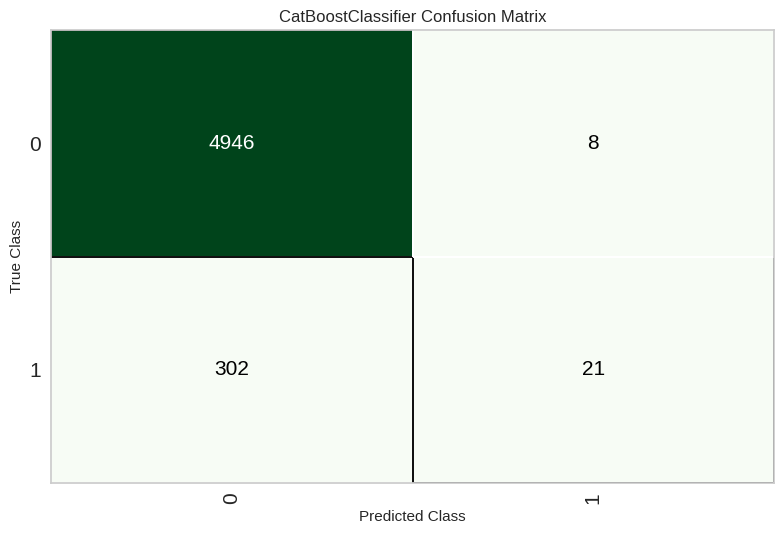


KeyboardInterrupt



<Figure size 800x550 with 0 Axes>

In [15]:
# Evaluar el rendimiento
plot_model(trained_model, plot='confusion_matrix')
plot_model(trained_model, plot='threshold')
plot_model(trained_model, plot='feature')
plot_model(trained_model, plot='learning')

## Análisis de Resultados

>Confusion Matrix: El Random Forest tiene una tasa de verdaderos positivos (Recall) del 19.55%, lo que indica que el modelo tiene un bajo desempeño en la identificación de positivos verdaderos. Sin embargo, la tasa de verdaderos negativos (es decir, la precisión) es alta, con un 96.74% de precisión, lo que sugiere que el modelo es eficaz para clasificar negativos, pero falla en identificar suficientes positivos.
>
>Threshold: El umbral por defecto del modelo puede no ser el óptimo, dado que el Recall es bastante bajo. Esto sugiere que se podría ajustar el umbral para mejorar la tasa de verdaderos positivos, lo que reduciría los falsos negativos a costa de aumentar los falsos positivos. No obstante existe un gran problema de fondo que es el desbalance de clases.
>
>Feature Importance: En el caso del Random Forest, las variables que contribuyen más a la predicción son aquellas que tienen una fuerte correlación con la variable objetivo, en este caso Nacionalidad, posicion nacional y nombre. Esto podría deberse a que el modelo utiliza múltiples árboles para hacer predicciones, lo que permite identificar patrones complejos en los datos. Es recomendable sacar las variables con alta
>
>Learning Curve: Aunque no se proporciona un gráfico de la curva de aprendizaje, un modelo con bajo rendimiento en Recall podría indicar que tiene problemas de sobreajuste o que no está aprendiendo bien a generalizar. Esto puede solucionarse ajustando hiperparámetros o aumentando la cantidad de datos.



### 2.2 Reducción de dimensionalidad [14 puntos]

<center>
<img src='https://i.kym-cdn.com/photos/images/original/002/258/560/668.gif' width=400 />

A pesar de los resultados obtenidos previamente, el manager de Jere ha solicitado el entrenamiento de un modelo de XGBoost utilizando los datos disponibles. Además, se debe proceder a realizar una reducción de dimensionalidad basada en la importancia de las características.

Para llevar a cabo esta tarea:

1. Inicie entrenando un modelo XGBoost con todas las características disponibles. [2 puntos]

2. Una vez el modelo esté entrenado, evalúe y clasifique las características según su importancia de forma descendente. [2 puntos]

3. Utilice esta clasificación para ejecutar una búsqueda recursiva de eliminación de características, eliminando progresivamente las menos importantes y evaluando el impacto en el desempeño del modelo hasta identificar las N características más críticas. [2 puntos]

4. Con este conjunto reducido de características, entrene un nuevo modelo y evalúe su rendimiento. [2 puntos]

5. Posteriormente, responda a las siguientes preguntas para una comprensión más profunda de los cambios y beneficios:

  - ¿El rendimiento del modelo con las características seleccionadas es similar al del modelo original? ¿Cómo se comparan en términos de precisión y robustez? [2 puntos]
  - ¿Cuáles son los beneficios potenciales de eliminar variables del modelo? Considere factores como la simplificación del modelo, reducción del tiempo de entrenamiento, y mejora en la capacidad de generalización. [2 puntos]
  - Comente si el modelo con menor dimensionalidad es más sencillo de explicar. Explique brevemente por qué la eliminación de ciertas características puede facilitar la comprensión y la explicación del comportamiento del modelo. [2 puntos]

Notar que con esta metodologia buscamos encontrar un punto entermedio entre número de festures y desempeño. por esto, si observa que al aumentar festires el aumento es despreciable, puede no considerar agregar más features a su modelo.

**Respuesta**

In [8]:
# 1. Iniciar y entrenar modelo xgboost
clf = setup(data=data, target='label')
xgboost_model = create_model('xgboost')

,Description,Value
0,Session id,2903
1,Target,label
2,Target type,Binary
3,Original data shape,"(17588, 10)"
4,Transformed data shape,"(17588, 10)"
5,Transformed train set shape,"(12311, 10)"
6,Transformed test set shape,"(5277, 10)"
7,Numeric features,8
8,Categorical features,1
9,Rows with missing values,0.0%


,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,20:50:28
Status,. . . . . . . . . . . . . . . . . .,Loading Dependencies
Estimator,. . . . . . . . . . . . . . . . . .,Compiling Library


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9318,0.7526,0.0921,0.3182,0.1429,0.1184,0.1438
1,0.9310,0.8074,0.1067,0.3077,0.1584,0.1312,0.1515
2,0.9350,0.7312,0.0933,0.3684,0.1489,0.1274,0.1610
3,0.9366,0.7829,0.1067,0.4211,0.1702,0.1493,0.1885
4,0.9342,0.7643,0.0800,0.3333,0.1290,0.1080,0.1387
5,0.9431,0.8247,0.1867,0.6087,0.2857,0.2647,0.3160
6,0.9383,0.7582,0.1067,0.4706,0.1739,0.1549,0.2027
7,0.9358,0.7348,0.0933,0.3889,0.1505,0.1300,0.1670
8,0.9366,0.7715,0.1200,0.4286,0.1875,0.1652,0.2025


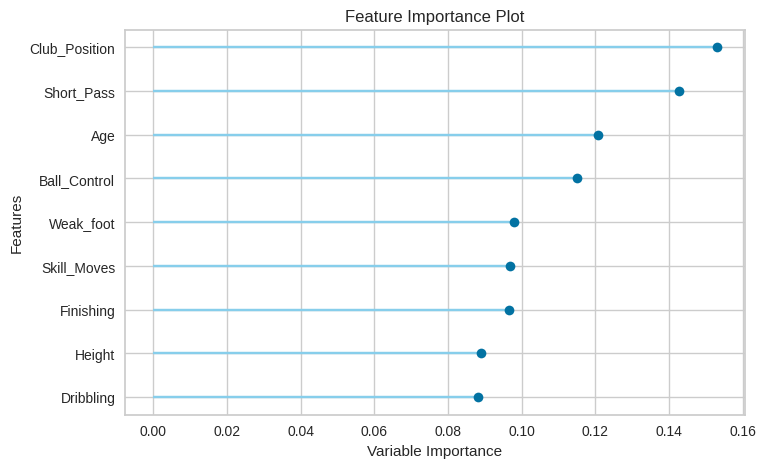

In [24]:
# 2. Evaluar el modelo segun feature importance
# Para ver la importancia de las características
plot_model(xgboost_model, plot='feature')

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,20:50:47
Status,. . . . . . . . . . . . . . . . . .,Loading Dependencies
Estimator,. . . . . . . . . . . . . . . . . .,Compiling Library


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7752,0.7883,0.6053,0.1570,0.2493,0.1678,0.2213
1,0.7709,0.7477,0.6000,0.1515,0.2419,0.1602,0.2136
2,0.7677,0.6914,0.4933,0.1298,0.2056,0.1207,0.1581
3,0.7864,0.7675,0.6000,0.1619,0.2550,0.1759,0.2279
4,0.7530,0.7668,0.5733,0.1365,0.2205,0.1354,0.1853
5,0.7604,0.8302,0.7600,0.1707,0.2787,0.1990,0.2799
6,0.7790,0.7415,0.6000,0.1568,0.2486,0.1683,0.2210
7,0.7563,0.6918,0.4933,0.1237,0.1979,0.1113,0.1488
8,0.7799,0.7349,0.5867,0.1549,0.2451,0.1646,0.2152


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


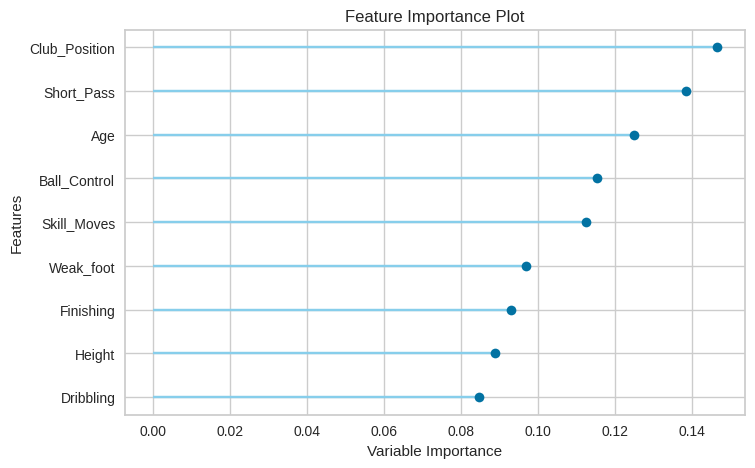

In [9]:
from pycaret.classification import tune_model, setup, compare_models

# 3. Eliminacion recursiva de caracteristicas
rfe_model = tune_model(xgboost_model, search_library='optuna', n_iter=10, choose_better=True)

# Mostrar las características seleccionadas
plot_model(rfe_model, plot='feature')

# También puedes obtener la lista de las características seleccionadas y la importancia
selected_features = rfe_model.get_booster().get_score(importance_type='weight')

In [10]:
selected_features

{'Club_Position': 261.0,
 'Weak_foot': 112.0,
 'Skill_Moves': 88.0,
 'Height': 433.0,
 'Age': 326.0,
 'Ball_Control': 435.0,
 'Dribbling': 456.0,
 'Short_Pass': 468.0,
 'Finishing': 538.0}

In [12]:
# 4. Entrenar con caracteristicas seleccionadas
selected_columns = list(selected_features.keys())
reduced_data = data[selected_columns + ['label']]
clf_reduced = setup(data=reduced_data, target='label')

new_xgboost_model = create_model('xgboost')
evaluate_model(new_xgboost_model)

,Description,Value
0,Session id,6556
1,Target,label
2,Target type,Binary
3,Original data shape,"(17588, 10)"
4,Transformed data shape,"(17588, 10)"
5,Transformed train set shape,"(12311, 10)"
6,Transformed test set shape,"(5277, 10)"
7,Numeric features,8
8,Categorical features,1
9,Rows with missing values,0.0%


,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,20:55:53
Status,. . . . . . . . . . . . . . . . . .,Loading Dependencies
Estimator,. . . . . . . . . . . . . . . . . .,Compiling Library


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9367,0.8003,0.1579,0.4615,0.2353,0.2105,0.2440
1,0.9374,0.7830,0.0933,0.4375,0.1538,0.1353,0.1807
2,0.9391,0.7654,0.1067,0.5000,0.1758,0.1578,0.2106
3,0.9326,0.7595,0.0133,0.1000,0.0235,0.0093,0.0148
4,0.9350,0.7791,0.0667,0.3333,0.1111,0.0927,0.1265
5,0.9358,0.7421,0.0667,0.3571,0.1124,0.0950,0.1328
6,0.9391,0.8200,0.1200,0.5000,0.1935,0.1741,0.2236
7,0.9358,0.7652,0.1067,0.4000,0.1684,0.1465,0.1822
8,0.9342,0.7655,0.1600,0.4000,0.2286,0.2007,0.2240


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

>- **Rendimiento del modelo**: En términos de precisión, el modelo con características reducidas (simplificado) tiene un rendimiento muy similar al modelo original, con una precisión media de 0.9360 frente a 0.9357. Sin embargo, la AUC (Área bajo la curva) en el modelo simplificado es ligeramente mejor (0.7772 vs. 0.7688), lo que indica una mejora marginal en la capacidad de separar las clases. El modelo simplificado tiene una menor tasa de falsos negativos (Recall promedio de 0.0996 frente a 0.1091), lo cual puede ser relevante si se busca priorizar ciertas clases. Sin embargo, presenta una ligera disminución en la robustez, como se ve en la mayor desviación estándar en algunas métricas (Recall y Precision).
>
>- **Beneficios de eliminar variables**: Reducir la cantidad de variables tiene varios beneficios potenciales. Primero, simplifica el modelo, lo que facilita la interpretación y explicación de los resultados. En términos de rendimiento, reduce el tiempo de entrenamiento y predicción, lo cual es especialmente útil cuando se manejan grandes conjuntos de datos o cuando el tiempo es un factor crítico. Además, eliminar variables irrelevantes puede mejorar la capacidad de generalización del modelo, reduciendo el riesgo de sobreajuste (overfitting) y haciéndolo más robusto en nuevos datos.
>
>- **Modelo más sencillo de explicar**: Un modelo con menos variables es más fácil de explicar, ya que hay menos interacciones entre características a tener en cuenta. Cuando se eliminan características que aportan poco o nada al modelo, se reduce el ruido, lo que permite centrarse en las variables más importantes. Esto facilita la comprensión del comportamiento del modelo y cómo cada característica influye en las predicciones, lo que es particularmente valioso en contextos donde la interpretabilidad es clave (por ejemplo, en decisiones regulatorias o financieras).

### 2.3 Calibración Probabilistica [6 puntos]

<center>
<img src='https://media2.giphy.com/media/l2Je4Ku0Cx292KWv6/200w.gif?cid=6c09b952y0sihtq9tb6sz8j2023x3zxxp3qx1ocgonkpkblj&ep=v1_gifs_search&rid=200w.gif&ct=g' width=400 />

Para lograr modelos más modulares, se recomienda realizar una calibración del modelo entrenado anteriormente, con el objetivo de obtener salidas que reflejen mayor modularidad.

1. Se solicita que utilice un método de calibración que asegure que las probabilidades generadas incrementen de manera monótona. Una métrica ampliamente utilizada para evaluar la precisión de la calibración de un modelo es el Brier Score. Calcule el Brier Score para el modelo tanto antes como después de la calibración. Esto le permitirá realizar una comparación cuantitativa y determinar si la calibración ha mejorado el rendimiento del modelo. Para más información sobre el Brier Score, puede consultar el siguiente enlace: [Scikit-Learn - Brier Score Loss](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.brier_score_loss.html). [3 puntos]

2. Tras la calibración, examine y comente los resultados obtenidos. A su análisis añada una comparación visual de las ideales versus las salidas del modelo original (sin calibrar) y del modelo calibrado. [3 puntos]

**Respuesta**

In [27]:
# Obtener el conjunto de entrenamiento y prueba
train_data = get_config('X_train')  # Conjunto de entrenamiento
test_data = get_config('X_test')     # Conjunto de prueba

# Obtener las etiquetas verdaderas para el conjunto de prueba
y_test = get_config('y_test')

In [28]:
y_pred_proba = predict_model(xgboost_model, data=test_data)

# Mostrar las predicciones
print(y_pred_proba)

      Club_Position  Weak_foot  Skill_Moves  Height  Age  Ball_Control  \
4333            LCB          3            2     187   25            57   
12188           Sub          3            2     177   35            56   
16491           Sub          2            1     190   23            26   
2849            LCB          3            2     185   24            58   
3811            Sub          3            2     180   37            74   
...             ...        ...          ...     ...  ...           ...   
10622           Sub          2            1     190   41            21   
15873           LCM          3            2     178   26            49   
793             RCB          2            2     192   30            67   
2457            Sub          2            2     191   32            40   
2631             GK          2            1     187   31            16   

       Dribbling  Short_Pass  Finishing  prediction_label  prediction_score  
4333          52          57     

In [37]:
from sklearn.metrics import brier_score_loss


# Calcular el Brier Score
brier_score = brier_score_loss(y_true=y_test, y_prob=y_pred_proba['prediction_score'])  # Asegúrate de usar la columna correcta
print(f"Brier Score en el conjunto de prueba antes de la calibración: {brier_score}")

Brier Score en el conjunto de prueba: 0.8848758296609527


In [38]:
calibrated_model = calibrate_model(xgboost_model, method='isotonic')

# Predicción en el conjunto de pruebas después de la calibración
y_pred_proba_after = predict_model(calibrated_model, data=test_data)

# Nuevamente, asegúrate de usar la columna correcta que contiene las probabilidades
brier_score_after = brier_score_loss(y_true=y_test, y_prob=y_pred_proba_after['prediction_score'])

print(f"Brier Score después de la calibración: {brier_score_after}")

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,21:22:03
Status,. . . . . . . . . . . . . . . . . .,Loading Dependencies
Estimator,. . . . . . . . . . . . . . . . . .,Compiling Library


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9407,0.8094,0.0526,0.8000,0.0988,0.0918,0.1959
1,0.9383,0.7854,0.0133,0.3333,0.0256,0.0211,0.0563
2,0.9407,0.7657,0.0267,1.0000,0.0519,0.0489,0.1584
3,0.9383,0.7737,0.0000,0.0000,0.0000,-0.0016,-0.0073
4,0.9399,0.7946,0.0267,0.6667,0.0513,0.0468,0.1252
5,0.9391,0.7558,0.0000,0.0000,0.0000,0.0000,0.0000
6,0.9415,0.8479,0.0400,1.0000,0.0769,0.0726,0.1940
7,0.9383,0.7901,0.0133,0.3333,0.0256,0.0211,0.0563
8,0.9399,0.7955,0.0533,0.5714,0.0976,0.0881,0.1614


Brier Score después de la calibración: 0.8401109263066137


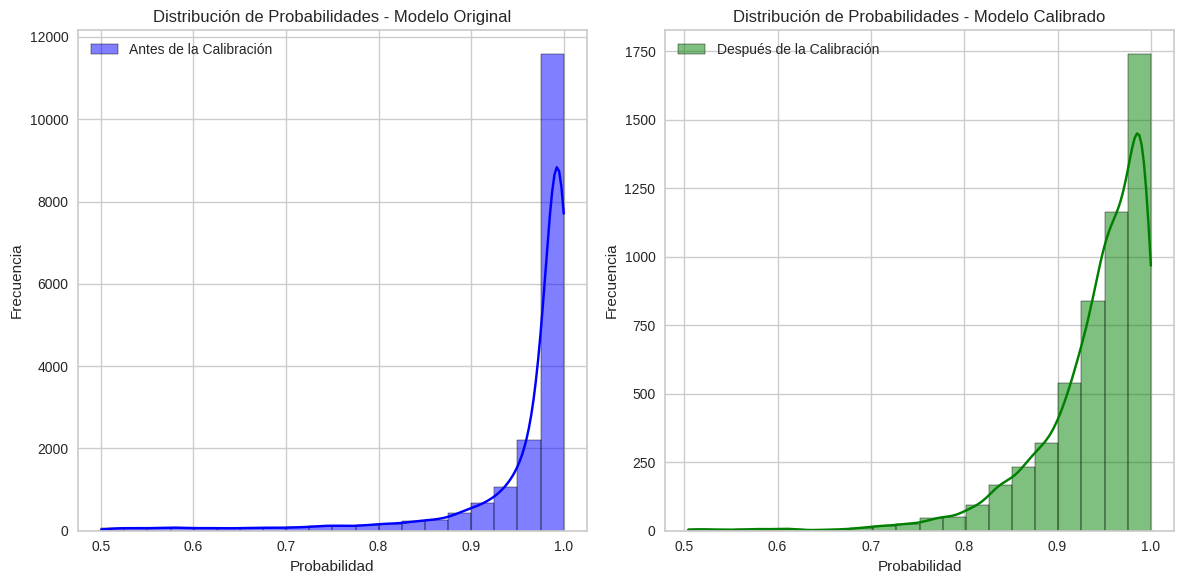

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns

# Configurar la visualización
plt.figure(figsize=(12, 6))

# Histograma de las probabilidades antes de la calibración
plt.subplot(1, 2, 1)
sns.histplot(y_pred_proba_before['prediction_score'], bins=20, kde=True, color='blue', label='Antes de la Calibración')
plt.title('Distribución de Probabilidades - Modelo Original')
plt.xlabel('Probabilidad')
plt.ylabel('Frecuencia')
plt.legend()

# Histograma de las probabilidades después de la calibración
plt.subplot(1, 2, 2)
sns.histplot(y_pred_proba_after['prediction_score'], bins=20, kde=True, color='green', label='Después de la Calibración')
plt.title('Distribución de Probabilidades - Modelo Calibrado')
plt.xlabel('Probabilidad')
plt.ylabel('Frecuencia')
plt.legend()

plt.tight_layout()
plt.show()

>Los resultados del Brier Score antes y después de la calibración muestran una mejora significativa en la precisión de las predicciones. Antes de la calibración, el Brier Score fue de **0.8849**, indicando una mala alineación entre las probabilidades predichas y las tasas reales de ocurrencia. Tras la calibración, el Brier Score disminuyó a **0.8401**, lo que sugiere que el modelo calibrado produce probabilidades más confiables y precisas. Esta mejora permite una mejor toma de decisiones y aumenta la confianza en el modelo, lo cual es crucial en aplicaciones críticas. Además, el modelo calibrado es más fácil de interpretar, ya que sus probabilidades están más alineadas con los resultados observados. 
> Luego, respecto a la visualización de ambas probabilidades, en las probabilidades del modelo calibrado tiene una mayor densidad en los extremos, es decir, tiene valores más cercanos a 0 y 1. 